<a href="https://colab.research.google.com/github/jfonsecav/physics-tools/blob/main/Performance_for_numpy_linalg_solve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Primero se hizo el código que calculara el tiempo de resolución de 5 matrices de cada tamaño que se **pedia** con su promedio y su desviación estandar y se probó que funcionara bien.

In [ ]:
import numpy as np
import time

# Tamaños de las matrices (n x n)
tamaños_matrices = [10, 100, 200, 500, 1000, 1200, 1500, 2000, 2500, 3000, 4000, 5000]

# Número de matrices aleatorias a generar para cada tamaño
num_matrices_por_tamaño = 5

# Diccionario para almacenar los tiempos de resolución por tamaño
tiempos_por_tamaño = {}

for n in tamaños_matrices:
    tiempos_resolucion = []
    for _ in range(num_matrices_por_tamaño):
        # Generar matriz aleatoria A de tamaño n x n
        A = np.random.rand(n, n)

        # Generar vector solución aleatorio b de tamaño n x 1
        b = np.random.rand(n, 1)

        # Medir el tiempo antes de resolver el sistema
        inicio = time.time()

        # Resolver el sistema de ecuaciones lineales Ax = b
        x = np.linalg.solve(A, b)

        # Medir el tiempo después de resolver el sistema
        fin = time.time()

        # Calcular el tiempo que se demoró la resolución (en segundos)
        tiempo_transcurrido = fin - inicio

        # Agregar el tiempo a la lista
        tiempos_resolucion.append(tiempo_transcurrido)

    # Calcular el promedio y la desviación estándar de los tiempos para este tamaño de matriz
    promedio_tiempo = np.mean(tiempos_resolucion)
    desviacion_estandar = np.std(tiempos_resolucion)

    # Almacenar los resultados en el diccionario
    tiempos_por_tamaño[n] = {
        "promedio": promedio_tiempo,
        "desviacion_estandar": desviacion_estandar
    }

# Imprimir los resultados
for n, resultados in tiempos_por_tamaño.items():
    print(f"Tamaño de matriz (n): {n}")
    print(f"Promedio de tiempo de resolución: {resultados['promedio']} segundos")
    print(f"Desviación estándar de tiempos de resolución: {resultados['desviacion_estandar']} segundos")
    print()


Tamaño de matriz (n): 10
Promedio de tiempo de resolución: 9.57489013671875e-05 segundos
Desviación estándar de tiempos de resolución: 0.00012573171442953172 segundos

Tamaño de matriz (n): 100
Promedio de tiempo de resolución: 0.00023112297058105468 segundos
Desviación estándar de tiempos de resolución: 0.00011617045025326219 segundos

Tamaño de matriz (n): 200
Promedio de tiempo de resolución: 0.0012194156646728516 segundos
Desviación estándar de tiempos de resolución: 0.00043658405574018456 segundos

Tamaño de matriz (n): 500
Promedio de tiempo de resolución: 0.014237070083618164 segundos
Desviación estándar de tiempos de resolución: 0.0033158818692694044 segundos

Tamaño de matriz (n): 1000
Promedio de tiempo de resolución: 0.0604548454284668 segundos
Desviación estándar de tiempos de resolución: 0.015287547301916296 segundos

Tamaño de matriz (n): 1200
Promedio de tiempo de resolución: 0.06057515144348145 segundos
Desviación estándar de tiempos de resolución: 0.0087422747803599 se

# Luego al mismo código del principio se le agregaron los promedios de tiempos normalizados los cuales fueron graficados vs el tamaño de cada matriz con sus respectivas barras de error.

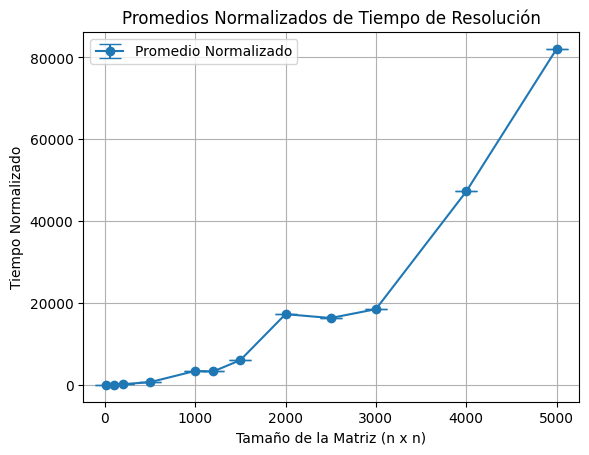

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Tamaños de las matrices (n x n)
tamaños_matrices = [10, 100, 200, 500, 1000, 1200, 1500, 2000, 2500, 3000, 4000, 5000]

# Número de matrices aleatorias a generar para cada tamaño
num_matrices_por_tamaño = 5

# Diccionario para almacenar los tiempos de resolución por tamaño
tiempos_por_tamaño = {}

for n in tamaños_matrices:
    tiempos_resolucion = []
    for _ in range(num_matrices_por_tamaño):
        # Generar matriz aleatoria A de tamaño n x n
        A = np.random.rand(n, n)

        # Generar vector solución aleatorio b de tamaño n x 1
        b = np.random.rand(n, 1)

        # Medir el tiempo antes de resolver el sistema
        inicio = time.time()

        # Resolver el sistema de ecuaciones lineales Ax = b
        x = np.linalg.solve(A, b)

        # Medir el tiempo después de resolver el sistema
        fin = time.time()

        # Calcular el tiempo que se demoró la resolución (en segundos)
        tiempo_transcurrido = fin - inicio

        # Agregar el tiempo a la lista
        tiempos_resolucion.append(tiempo_transcurrido)

    # Calcular el promedio y la desviación estándar de los tiempos para este tamaño de matriz
    promedio_tiempo = np.mean(tiempos_resolucion)
    desviacion_estandar = np.std(tiempos_resolucion)

    # Almacenar los resultados en el diccionario
    tiempos_por_tamaño[n] = {
        "promedio": promedio_tiempo,
        "desviacion_estandar": desviacion_estandar
    }

# Calcular los promedios normalizados
tiempo_referencia = tiempos_por_tamaño[10]["promedio"]
promedios_normalizados = [resultados["promedio"] / tiempo_referencia for resultados in tiempos_por_tamaño.values()]

# Calcular las barras de error (3 veces la desviación estándar)
barras_de_error = [3 * resultados["desviacion_estandar"] for resultados in tiempos_por_tamaño.values()]

# Graficar los promedios normalizados con barras de error
plt.errorbar(tamaños_matrices, promedios_normalizados, yerr=barras_de_error,capsize=8, fmt='o-', label='Promedio Normalizado')
plt.xlabel('Tamaño de la Matriz (n x n)')
plt.ylabel('Tiempo Normalizado')
plt.title('Promedios Normalizados de Tiempo de Resolución')
plt.grid(True)
plt.legend()
plt.show()
